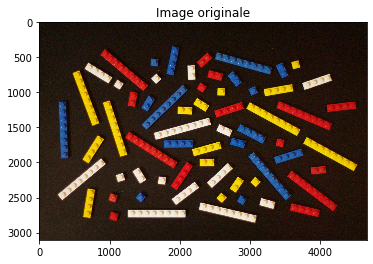

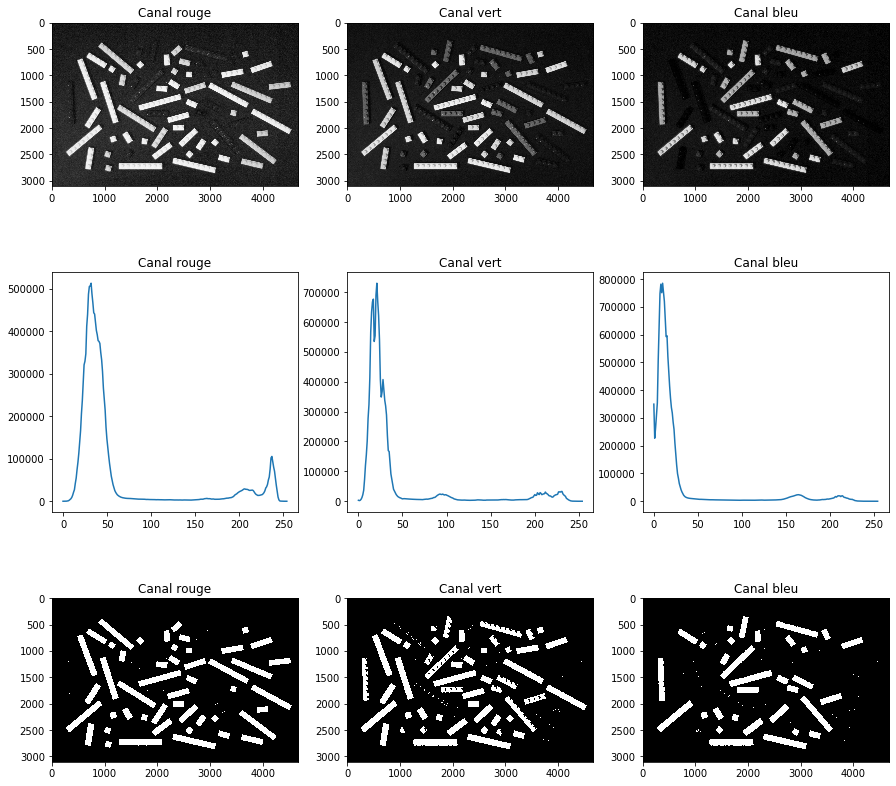

In [1]:
%matplotlib inline
import skimage.io.imread
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import scipy.signal as signal
import skimage
import skimage.exposure as expo
from skimage import data
from skimage import filters
from skimage import morphology
from skimage import color
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb

lego=imageio.imread("%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import scipy.signal as signal
import skimage
import skimage.exposure as expo
from skimage.io import imread
from skimage import data
from skimage import filters
from skimage import morphology
from skimage import color
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb

lego=imread("https://github.com/srivol/visionindus/raw/master/legoFondnoir1.JPG")

plt.imshow(lego)
plt.title('Image originale')

#legoFondnoir1.JPG : 70,50,50
#legoFondnoir2.JPG : 70,50,50
#legoFondnoir.jpg : 70,50,50
sR=100
sG=50
sB=50

legoR=lego[:,:,0]
legoG=lego[:,:,1]
legoB=lego[:,:,2]
hR,binsR=np.histogram(legoR,256,range=(0,255))
hG,binsG=np.histogram(legoG,256,range=(0,255))
hB,binsB=np.histogram(legoB,256,range=(0,255))
legoBINR=legoR>=sR
legoBING=legoG>=sG
legoBINB=legoB>=sB

plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.imshow(legoR, cmap=plt.cm.gray)
plt.title('Canal rouge')
plt.subplot(332)
plt.imshow(legoG, cmap=plt.cm.gray)
plt.title('Canal vert')
plt.subplot(333)
plt.imshow(legoB, cmap=plt.cm.gray)
plt.title('Canal bleu')
plt.subplot(334)
plt.plot(binsR[:-1], hR)
plt.title('Canal rouge')
plt.subplot(335)
plt.plot(binsG[:-1], hG)
plt.title('Canal vert')
plt.subplot(336)
plt.plot(binsB[:-1], hB)
plt.title('Canal bleu')
plt.subplot(337)
plt.imshow(legoBINR, cmap=plt.cm.gray)
plt.title('Canal rouge')
plt.subplot(338)
plt.imshow(legoBING, cmap=plt.cm.gray)
plt.title('Canal vert')
plt.subplot(339)
plt.imshow(legoBINB, cmap=plt.cm.gray)
plt.title('Canal bleu')
plt.show()

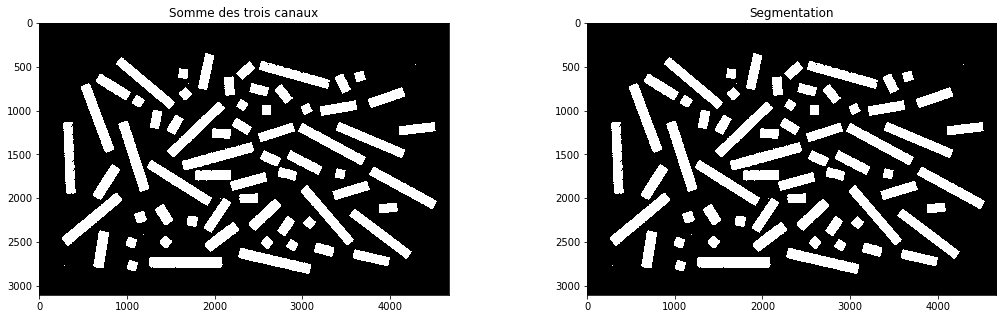

In [2]:
legoNDG=legoBINR+legoBING+legoBINB

legoBIN=np.copy(legoNDG)
legoBIN=legoNDG>=1
legoBIN=legoBIN.astype(np.uint8)

plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.imshow(legoNDG, cmap=plt.cm.gray)
plt.title('Somme des trois canaux')
plt.subplot(122)
plt.imshow(legoBIN, cmap=plt.cm.gray)
plt.title('Segmentation')

plt.show()

In [ ]:
legoLABEL=label(legoBIN)
measures=regionprops(legoLABEL)
legoLABELaire=np.zeros(legoLABEL.shape)
n=np.max(legoLABEL).astype(int)
for k in np.arange(0,n):
    legoLABELaire[legoLABEL==measures[k].label]=measures[k].area
legoLABELaire.astype(np.uint8)
haire,binsaire = np.histogram(legoLABELaire,256)
    
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(legoLABEL)
plt.title("Etiquetage 'nb de pièces'")
plt.subplot(132)
plt.imshow(legoLABELaire, cmap=plt.cm.gray)
plt.title("Etiquetage 'valeur de l'aire de l'objet'")
plt.subplot(133)
plt.plot(binsaire[:-1], haire)

plt.show()

In [ ]:
#legoFondnoir1.JPG : 
s1=50
s2=20000
s3=40000
s4=70000

#legoFondnoir2.JPG : 
#s1=50
#s2=20000
#s3=40000
#s4=70000

#legoFondnoir.jpg : 
"""
s1=50
s2=10000
s3=20000
s4=40000
"""

legoLABELaire2=np.copy(legoLABELaire)
legoLABELaire2[legoLABELaire2<s1]=0
legoLABELaire2[np.logical_and(s1<=legoLABELaire2, legoLABELaire2<s2)]=1
legoLABELaire2[np.logical_and(s2<=legoLABELaire2, legoLABELaire2<s3)]=2
legoLABELaire2[np.logical_and(s3<=legoLABELaire2, legoLABELaire2<s4)]=3
legoLABELaire2[legoLABELaire2>=s4]=4
plt.imshow(legoLABELaire2)
plt.title('Etiquetage 0 à 4 en fonction de l aire de l objet')
plt.show()

rgb=color.label2rgb(legoLABELaire2,kind='overlay')
plt.imshow(rgb)
plt.show()
imageio.imsave('legoTriTaille.jpg',rgb)